In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
emo=pd.read_csv('emo.csv')
emo.head()

,Subj,RT,response code,affect,up/in,old/new
0,90,1110,2,l,up,2
1,90,1835,2,l,up,2
2,90,1377,1,l,up,2
3,90,922,1,s,up,1
4,90,2969,1,l,in,2


In [3]:
accuracy=emo['response code']==emo['old/new']

In [4]:
emo['accuracy']=accuracy.map({True:1, False:0})
emo['up/in']=emo['up/in'].map({'up':'Whole', 'in':'Features'})
emo['affect']=emo['affect'].map({'h':'Positive', 's':'Negative'})

In [6]:
pd.pivot_table(emo, values='accuracy', index=['affect', 'up/in'], columns=['old/new'])

old/new                   1
affect   up/in             
Negative Features  0.672222
         Whole     0.672222
Positive Features  0.591667
         Whole     0.758333

In [7]:
means=pd.DataFrame(emo.groupby(['Subj', 'affect', 'up/in'])['accuracy'].mean())

In [8]:
means.reset_index(inplace=True)

In [9]:
means.head()

,Subj,affect,up/in,accuracy
0,90,Negative,Features,0.750
1,90,Negative,Whole,0.625
2,90,Positive,Features,0.500
3,90,Positive,Whole,0.375
4,92,Negative,Features,0.750


In [10]:
old=means[means['affect']!='l']
old.head()

,Subj,affect,up/in,accuracy
0,90,Negative,Features,0.750
1,90,Negative,Whole,0.625
2,90,Positive,Features,0.500
3,90,Positive,Whole,0.375
4,92,Negative,Features,0.750


In [11]:
up_old=old[old['up/in']=='up']
in_old=old[old['up/in']=='in']

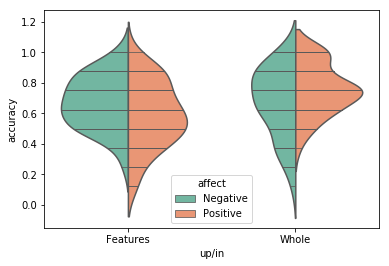

In [19]:
viosplit=sns.violinplot(x="up/in", y="accuracy", hue='affect', split=True, inner="stick", data=old, palette="Set2")

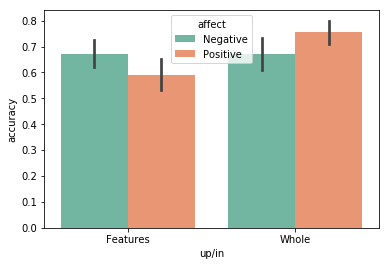

In [28]:
bar=sns.barplot(x="up/in", y="accuracy", hue='affect', data=old, palette="Set2")

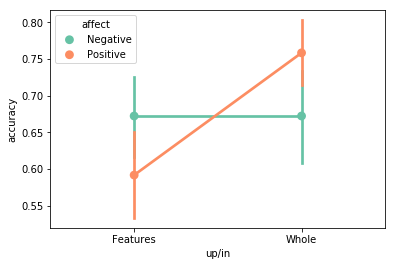

In [21]:
line=sns.pointplot(x="up/in", y="accuracy", hue='affect', data=old, palette="Set2", );

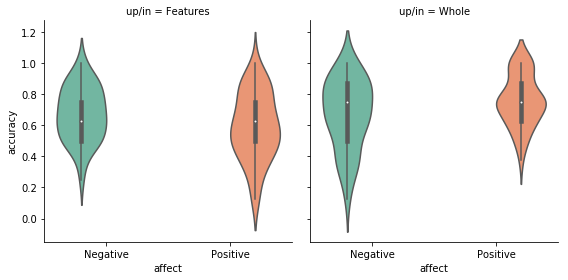

In [22]:
vio=sns.factorplot(x="affect", y="accuracy", hue="affect",
               col="up/in", data=old, kind="violin", palette='Set2');

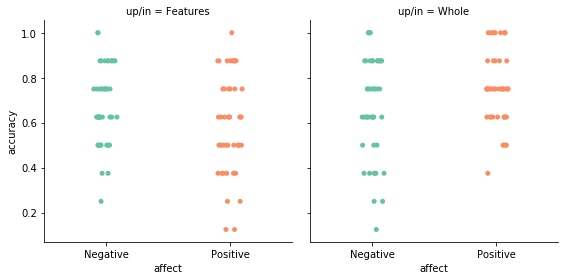

In [23]:
strip=sns.factorplot(x="affect", y="accuracy", hue="affect",
               col="up/in", data=old, kind="strip", jitter=True, palette='Set2');

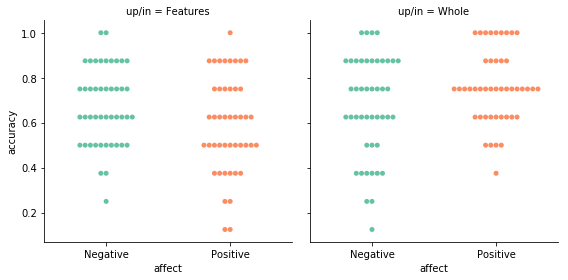

In [24]:
swarm=sns.factorplot(x="affect", y="accuracy", hue="affect",
               col="up/in", data=old, kind="swarm", palette='Set2');

In [26]:
barfig=bar.get_figure()
barfig.savefig('emo_bar.png')